In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [2]:
pip install plot3D

In [3]:
def training_svm(x_train, y_train, x_test, y_test, r, C_par):
    best_accuracy = 0
    best_value = 0
    accuracy_list = []

    for i in range(len(r)):
        svm = SVC(kernel='rbf', gamma=1/(2*r[i]**2), C=C_par[i])
        svm.fit(x_train, y_train)
        y_hat = svm.predict(x_test)
        accuracy = accuracy_score(y_test, y_hat)
        accuracy_list.append(accuracy)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            svm_salve = svm
            best_value = i

    return svm_salve, accuracy_list, best_value

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data = pd.read_csv('/content/drive/MyDrive/UFMG/Reconhecimento de padrões/00.Data/spirals.csv')
x = data[['x.1', 'x.2']].to_numpy()
y = data['classes'].astype(int)

np.random.seed(13)
index = np.random.permutation(len(x))
x = x[index, :]
y = y[index]

colors = np.array(['b', 'r'])
class_colors = colors[y - 1]
y=(y-1.5)*2

<ipython-input-7-5df751ad25fe>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x[:, 0], x[:, 1], c=class_colors, cmap=plt.cm.Paired)


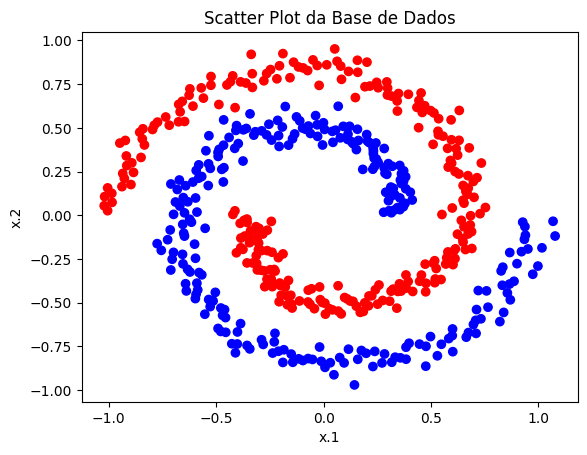

In [7]:
plt.scatter(x[:, 0], x[:, 1], c=class_colors, cmap=plt.cm.Paired)
plt.title("Scatter Plot da Base de Dados")
plt.xlabel("x.1")
plt.ylabel("x.2")
plt.show()

In [8]:
n_rows = x.shape[0]
training_sample_number = round(n_rows * 0.7)
x_train = x[:training_sample_number, :]
y_train = y[:training_sample_number]
x_test = x[training_sample_number:, :]
y_test = y[training_sample_number:]

In [9]:
r = [0.1, 0.1, 0.1, 1.5, 1.5, 1.5, 0.2, 0.2, 0.2]
C_par = [10, 100, 1000, 10, 100, 1000, 10, 100, 1000]

results = training_svm(x_train, y_train, x_test, y_test, r, C_par)
svm = results[0]
accuracy_list = results[1]

In [10]:
print(pd.DataFrame({'Accuracy': accuracy_list}))

   Accuracy
0  0.993333
1  0.993333
2  0.993333
3  0.693333
4  0.946667
5  0.966667
6  1.000000
7  1.000000
8  1.000000


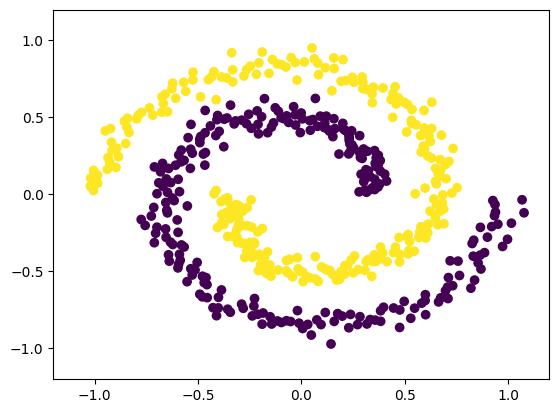

In [11]:
plt.scatter(x[:, 0], x[:, 1], c=1 * (y >= 0) + 1)
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.show()

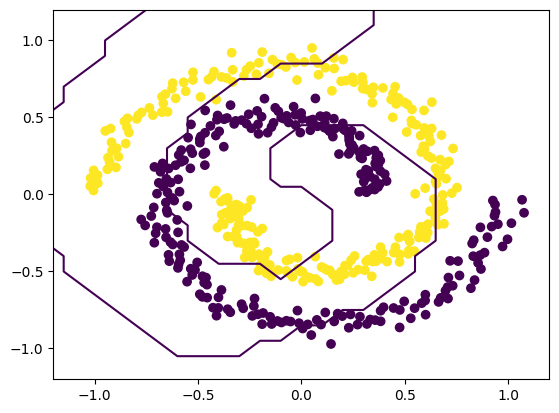

In [12]:
x1seq = np.arange(-1.2, 1.3, 0.1)
x2seq = np.arange(-1.2, 1.3, 0.1)

M = np.zeros((len(x1seq), len(x2seq)))

for i, x1 in enumerate(x1seq):
    for j, x2 in enumerate(x2seq):
        x1 = x1seq[i]
        x2 = x2seq[j]
        xin = np.array([x1, x2]).reshape(1, -1)
        M[i, j] = svm.predict(xin)

plt.scatter(x[:, 0], x[:, 1], c=1 * (y >= 0) + 1)
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.contour(x1seq, x2seq, M, levels=[0])

In [ ]:
x1_seq = np.arange(-1.2, 1.2, 0.1)
x2_seq = np.arange(-1.2, 1.2, 0.1)
M = np.zeros((len(x1_seq), len(x2_seq)))

In [ ]:
for i, x1 in enumerate(x1_seq):
    for j, x2 in enumerate(x2_seq):
        x_in = np.array([x1, x2])  # Change this line
        M[i, j] = svm.decision_function([x_in])  # Change this line


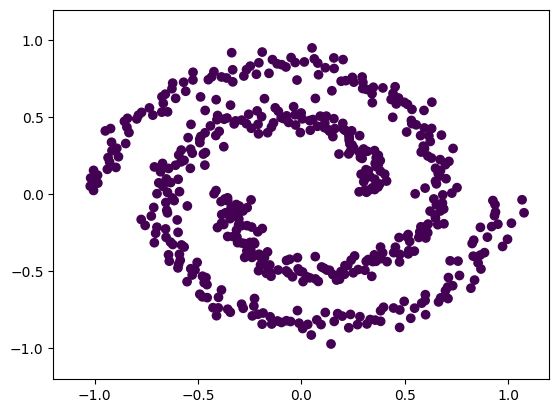

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

def training_svm(x_train, y_train, x_test, y_test, r, C_par):
    best_accuracy = 0
    best_value = 0
    accuracy_list = []

    for i in range(len(r)):
        # Standardize the data before training the SVM model
        scaler = StandardScaler()
        x_train_scaled = scaler.fit_transform(x_train)
        x_test_scaled = scaler.transform(x_test)

        svm = SVC(kernel='rbf', gamma=1/(2*r[i]**2), C=C_par[i])
        svm.fit(x_train_scaled, y_train)
        y_hat = svm.predict(x_test_scaled)
        accuracy = accuracy_score(y_test, y_hat)
        accuracy_list.append(accuracy)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            svm_salve = svm
            best_value = i

    return svm_salve, accuracy_list, best_value

# Load the data
data = pd.read_csv('/content/drive/MyDrive/UFMG/Reconhecimento de padrões/00.Data/spirals.csv')
x = data[['x.1', 'x.2']].to_numpy()
y = data['classes'].astype(int)

# Split the data into training and testing sets
np.random.seed(13)
index = np.random.permutation(len(x))
x = x[index, :]
y = y[index]

n_rows = x.shape[0]
training_sample_number = round(n_rows * 0.7)
x_train = x[:training_sample_number, :]
y_train = y[:training_sample_number]
x_test = x[training_sample_number:, :]
y_test = y[training_sample_number:]

# Define the values for the kernel parameter (r) and regularization parameter (C_par)
r = [0.1, 0.1, 0.1, 1.5, 1.5, 1.5, 0.2, 0.2, 0.2]
C_par = [10, 100, 1000, 10, 100, 1000, 10, 100, 1000]

# Train the SVM model and evaluate its performance
results = training_svm(x_train, y_train, x_test, y_test, r, C_par)
svm = results[0]
accuracy_list = results[1]

# Plot the data and the decision surface
x1seq = np.arange(-1.2, 1.3, 0.1)
x2seq = np.arange(-1.2, 1.3, 0.1)

M = np.zeros((len(x1seq), len(x2seq)))

for i, x1 in enumerate(x1seq):
    for j, x2 in enumerate(x2seq):
        x1 = x1seq[i]
        x2 = x2seq[j]
        xin = np.array([x1, x2]).reshape(1, -1)
        M[i, j] = svm.predict(xin)

plt.scatter(x[:, 0], x[:, 1], c=1 * (y >= 0) + 1)
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.contour(x1seq, x2seq, M, levels=[0])
